### importing the required libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import pylab as pl

### importing the dataset

In [2]:
df = pd.read_excel("DR-data-edit.xlsx")

### check if dataset is imported correctly

In [3]:
display(df)

,Unnamed: 0,Факултетен номер,Лекция 1,Лекция 2,Лекция 3,Упражнение 3,Решени задачи 3,Лекция 4,Упражнение 4,Решени задачи 4,...,Общо точки,Оценка,Крайна оценка,Контролна_1,Тест_1,Контролна_2,Тест_2,Бонус_,Общо_точки,Оценка_
0,0,2113811001,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,...,52.772775,3,3.0,11.0,4.0,17.0,10.0,10.772775,52.772775,3
1,1,2113811002,1.0,1.0,NaN,1.0,0.50,NaN,1.0,1.0,...,45.488650,2,3.0,12.0,10.0,6.0,12.5,8.990000,49.490000,3
2,2,2113811003,1.0,1.0,1.0,1.0,0.75,NaN,NaN,NaN,...,10.284100,2,2.0,NaN,2.0,NaN,5.0,3.284100,10.284100,2
3,3,2113811004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500000,2,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000,2
4,4,2113811005,1.0,1.0,1.0,NaN,0.50,1.0,1.0,1.0,...,31.727300,2,3.0,11.0,4.0,NaN,7.5,9.227300,31.727300,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,2013231013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,2,2.0,NaN,NaN,NaN,NaN,0.000000,0.000000,2
140,140,2013231014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.500000,2,3.0,2.0,NaN,NaN,NaN,1.500000,3.500000,2
141,141,2013231017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.500000,2,2.0,7.0,NaN,NaN,NaN,0.500000,7.500000,2
142,142,2013231018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,2,2.0,NaN,NaN,NaN,NaN,0.000000,0.000000,2


### cleaning the NaN values

In [4]:
df = df.replace(np.nan, 0)
display(df)

,Unnamed: 0,Факултетен номер,Лекция 1,Лекция 2,Лекция 3,Упражнение 3,Решени задачи 3,Лекция 4,Упражнение 4,Решени задачи 4,...,Общо точки,Оценка,Крайна оценка,Контролна_1,Тест_1,Контролна_2,Тест_2,Бонус_,Общо_точки,Оценка_
0,0,2113811001,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,...,52.772775,3,3.0,11.0,4.0,17.0,10.0,10.772775,52.772775,3
1,1,2113811002,1.0,1.0,0.0,1.0,0.50,0.0,1.0,1.0,...,45.488650,2,3.0,12.0,10.0,6.0,12.5,8.990000,49.490000,3
2,2,2113811003,1.0,1.0,1.0,1.0,0.75,0.0,0.0,0.0,...,10.284100,2,2.0,0.0,2.0,0.0,5.0,3.284100,10.284100,2
3,3,2113811004,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.500000,2,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,2
4,4,2113811005,1.0,1.0,1.0,0.0,0.50,1.0,1.0,1.0,...,31.727300,2,3.0,11.0,4.0,0.0,7.5,9.227300,31.727300,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,2013231013,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.000000,2,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2
140,140,2013231014,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,3.500000,2,3.0,2.0,0.0,0.0,0.0,1.500000,3.500000,2
141,141,2013231017,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,7.500000,2,2.0,7.0,0.0,0.0,0.0,0.500000,7.500000,2
142,142,2013231018,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.000000,2,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2


### removing unnecesary columns

In [5]:
df = df.drop(["Unnamed: 0"], axis=1)
df = df.drop(["Факултетен номер"], axis=1)
display(df)

,Лекция 1,Лекция 2,Лекция 3,Упражнение 3,Решени задачи 3,Лекция 4,Упражнение 4,Решени задачи 4,Лекция 5,Упражнение 5,...,Общо точки,Оценка,Крайна оценка,Контролна_1,Тест_1,Контролна_2,Тест_2,Бонус_,Общо_точки,Оценка_
0,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,1.0,1.0,...,52.772775,3,3.0,11.0,4.0,17.0,10.0,10.772775,52.772775,3
1,1.0,1.0,0.0,1.0,0.50,0.0,1.0,1.0,1.0,1.0,...,45.488650,2,3.0,12.0,10.0,6.0,12.5,8.990000,49.490000,3
2,1.0,1.0,1.0,1.0,0.75,0.0,0.0,0.0,0.0,0.0,...,10.284100,2,2.0,0.0,2.0,0.0,5.0,3.284100,10.284100,2
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.500000,2,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,2
4,1.0,1.0,1.0,0.0,0.50,1.0,1.0,1.0,1.0,1.0,...,31.727300,2,3.0,11.0,4.0,0.0,7.5,9.227300,31.727300,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,2,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2
140,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,3.500000,2,3.0,2.0,0.0,0.0,0.0,1.500000,3.500000,2
141,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,7.500000,2,2.0,7.0,0.0,0.0,0.0,0.500000,7.500000,2
142,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,2,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2


### plotting grades with respect to total score

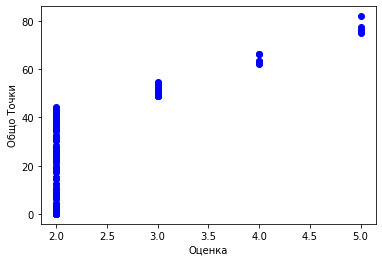

In [6]:
plt.scatter(df.Оценка_, df.Общо_точки, color='blue')
plt.xlabel("Оценка")
plt.ylabel("Общо Точки")
plt.show()

### creating train and test dataset

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### train data distribution

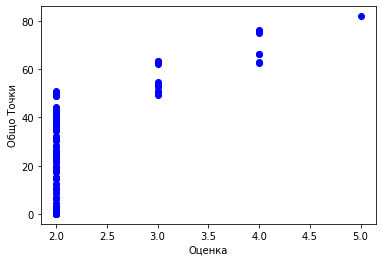

In [8]:
plt.scatter(train.Оценка, train.Общо_точки, color='blue')
plt.xlabel("Оценка")
plt.ylabel("Общо Точки")
plt.show()

### putting names into variable list

In [9]:
df_list = ['Лекция 1', 'Лекция 2', 'Лекция 3', 'Упражнение 3', 'Решени задачи 3',
           'Лекция 4', 'Упражнение 4', 'Решени задачи 4', 'Лекция 5', 'Упражнение 5',
           'Решени задачи 5', 'Лекция 6', 'Упражнение 6', 'Решени задачи 6', 'Лекция 7',
           'Упражнение 7', 'Решени задачи 7', 'Лекция 8', 'Упражнение 8', 'Решени задачи 8',
           'Лекция 9', 'Упражнение 9', 'Решени задачи 9', 'Лекция 10', 'Упражнение 10',
           'Решени задачи 10', 'Лекция 11', 'Упражнение 11', 'Решени задачи 11', 'Лекция 12',
           'Упражнение 12', 'Решени задачи 12', 'Бонус активност', 'Бонус задачи', 'Бонус общо',
           'Лекция -28.09', 'Седмица 1', 'Седмица 2', 'Седмица 3', 'Седмица 4',
           'Седмица 4 - активност', 'Седмица 5', 'Седмица 5 - активност', 'Лекция 2.11', 'Седмица 6',
           'Седмица 6 - активност', 'Седмица 8', 'Седмица 8 - активност', 'Седмица 9', 'Седмица 9 - активност',
           'Седмица 10', 'Седмица 10 - активност', 'Седмица 11', 'Седмица 11 - активност', 'Седмица 12',
           'Седмица 12 - активност', 'Седмица 13', 'Седмица 13 - активност', 'Седмица общо', 'Контролна 1',
           'Тест 1', 'Контролна 2', 'Тест 2', 'Бонус', 'Общо точки',
           'Оценка', 'Крайна оценка', 'Контролна_1', 'Тест_1', 'Контролна_2',
           'Тест_2', 'Бонус_', 'Общо_точки']


### trying the Multiple Regression Model

In [10]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[df_list])
y = np.asanyarray(train[['Оценка_']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)

Coefficients:  [[ 1.86880646e-01  1.01921251e-02  5.29381881e-02  2.20247534e-01
  -5.35839758e-02  2.94568847e-01  1.06050792e-01 -1.40410682e-01
   1.10631449e-01  1.87128149e-01 -1.09933122e-01  2.40762690e-01
   1.83843788e-01  3.23366558e-01 -1.08096365e-01  2.30730390e-01
  -2.91447807e-01  1.79802499e-01  1.54471616e-01  3.96304052e-01
   1.68716037e-01  2.63229688e-01 -1.27418255e-01  1.16762836e-01
   1.11880668e-01 -3.71988370e-02  2.15246305e-01 -8.91332223e-02
   1.23461920e-01  4.90409781e-02  2.15165754e-01 -2.21362751e-01
  -2.68969954e-01  1.31899533e-01 -1.37070421e-01  3.69976597e-02
  -4.80587266e-03 -7.43562963e-02  9.78532885e-02  2.07931167e-02
  -4.34161497e-02 -2.07754190e-02 -8.76887131e-03  3.01899629e-03
  -7.41867246e-02  2.00244407e-01  6.12148592e-02 -2.10204647e-01
   1.00886321e-01  1.23398179e-01 -6.73522637e-02  1.19340535e-02
  -1.42024920e-01  1.70619147e-01 -3.17426784e-02 -2.04315648e-01
  -2.54456569e-02  2.77555756e-17 -8.04351187e-02 -1.62148328

### prediction

In [16]:
y_hat = regr.predict(test[df_list])
x = np.asanyarray(test[df_list])
y = np.asanyarray(test[['Оценка_']])
print("Residual sum of squares: %.2f"
     % np.mean((y_hat - y) ** 2))
print(f"Variance score: {(regr.score(x, y)*100):.2f}%")

Residual sum of squares: 0.07
Variance score: 86.99%
